In [8]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad
from math import sqrt, cos, sin, pi

g = 9.81
J = 0.000024800 # kg*m^2
rho = 0.022530346 # m
m =  0.06385 # kg
J = m*rho**2
r = 0.0065/2 # m
d = 0.75 # coeff of loss
n = 0 # number of iteration
downward = True
k = g/(1+(J/(m*r**2)) *(1-d)**n)
dt = 0.01
c1 = 0
L = 0.2 # m

def reset_k():
    global k
    k = abs(g / (1 + (J/(m*r**2)) * (d ** n)))

def change_r(h):
    global r
    r = ((11/1000)*h+80/10000)*0.5

def func_down(c1, k, t):
    return 0.25*(2*c1*sqrt(k)*t + c1**2 + k*t**2)

def func_up(c1, k, t):
    return 0.25*(4*L-2*c1*sqrt(k)*t - c1**2 - k*t**2)


t = []
t_up = 0
t_down = 0
tension = []
y_t = []
y_new = 0
for i in np.arange(0, 16+dt, dt): # i - sec
    t.append(i)
    y = 0
    if downward:
        t_up = 0
        dis = 4*k*t_down**2- 4*(k*t_down**2 -4*y)
        c1 = t_down*k**0.5 - 0.5 * dis**0.5
        y = y_new+func_down(c1, k, t_down)
        if y>=L: # stop moment
            downward = False
            n+=1
            reset_k()
            dis = 4*k*t_down**2- 4*(k*t_down**2 -4*y)
            c1 = t_down*k**0.5 - 0.5 * dis**0.5
        # print("if")
        t_down+=dt
    else: # goes upward till y' <= 0
        t_down = 0
        dis = 4*k*t_up**2- 4*(4*y-4*L+k*t_up**2)
        c1 = t_up*k**0.5 - 0.5 * dis**0.5
        y = L-(d**n)*func_up(c1, k, t_up)
        y_dot = -0.5*c1*sqrt(k)-k*t_up
        # print(y_dot)
        if y_dot<=0: # moment of reaching max height
            downward = True
            y_new = y
            reset_k()
            dis = 4*k*t_up**2- 4*(4*y-4*L+k*t_up**2)
            c1 = t_up*k**0.5 - 0.5 * dis**0.5
            # print(y_dot)
        t_up+=dt
        # print(n)
    change_r(y)
    tension.append(0.5*c1*sqrt(k)+2*k*i)
    y_t.append(y)


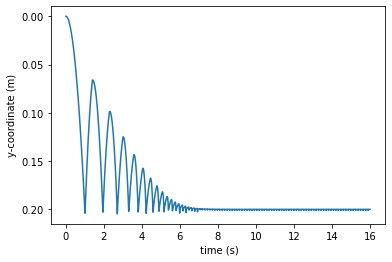

In [9]:
import matplotlib.pyplot as plt

plt.plot(t, y_t)
plt.xlabel(' time (s)')
plt.ylabel('y-coordinate (m)')
plt.gca().invert_yaxis()
# plt.savefig('pic3.png', dpi=300)
plt.show()

In [10]:
x1 = 6
x2 = 10
x3 = 8

x = np.array([x1,x2,x3])
print(x.mean())
print(x.std())

8.0
1.632993161855452


## hide

### me


In [11]:
exp1 = []
exp2 = []
exp3 = []
exp4 = []
exp5 = []


In [12]:
exp1 = np.array(exp1) # 16 sec
t_exp1 = np.linspace(0.5,16.5, exp1.size)
exp1 = exp1*(0.6/exp1.max())

exp2 = np.array(exp2) # 16 sec
t_exp2 = np.linspace(1,17, exp2.size)

exp2 = exp2*(0.5/exp2.max())

exp3 = np.array(exp3) # 16 sec
t_exp3 = np.linspace(0,16, exp3.size)
exp3 = exp3*(0.4/exp3.max())

exp4 = np.array(exp4) # 14 sec
t_exp4 = np.linspace(0.9,14.9, exp4.size)
exp4 = exp4*(0.3/exp4.max())

exp5 = np.array(exp5) # 18 sec
t_exp5 = np.linspace(0,18, exp5.size)
exp5 = exp5*(0.2/exp5.max())

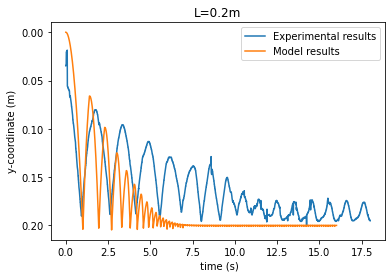

In [13]:
plt.plot(t_exp5, exp5)
plt.plot(t, y_t)
plt.title(f"L={L}m")
plt.xlabel(' time (s)')
plt.ylabel('y-coordinate (m)')
plt.legend(["Experimental results", "Model results"])
plt.gca().invert_yaxis()
plt.savefig('pic12.png', dpi=300)
plt.show()

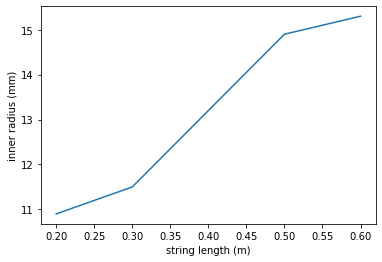

In [14]:
len = np.linspace(0.6, 0.2, 5)
data = [15.3, 14.9, 13.2, 11.5, 10.9]
plt.plot(len, data)
plt.xlabel('string length (m)')
plt.ylabel('inner radius (mm)')
# plt.savefig('pic7.png', dpi=300)
plt.show()
